In [138]:
import pandas as pd
from sklearn import tree
from io import StringIO
from inspect import getmembers
from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

In [139]:
class_names = ['NR', 'R']

def fit_decision_tree(X, y, min_samples_leaf):
    clf = tree.DecisionTreeClassifier(min_samples_leaf=min_samples_leaf, random_state=12232)
    clf = clf.fit(X, y)

    return clf

def plot_decision_tree(clf, feature_names, model, min_leaf):
    plt.figure(figsize=(50, 40))  # Adjust the figure size as needed
    plot_tree(clf, filled=True, feature_names=feature_names, class_names=class_names)
    plt.savefig(f"/home/sergiov/PycharmProjects/BLCA_Subtypes/Studies/decision_trees/decision_tree_{model}_min_leafs{min_leaf}.pdf")
    plt.savefig(f"/home/sergiov/PycharmProjects/BLCA_Subtypes/Studies/decision_trees/decision_tree_{model}_min_leafs{min_leaf}.png")

In [147]:
data = pd.read_csv('/datasets/sergio/Integrated_data/df_WES+RNA_response.csv', index_col=0)

In [148]:
data = data[data['TCGA.subtype'] == 'Neuronal']

In [127]:
data = data[data['Infiltration'] == 'Infiltrated']

In [149]:
model_1_variables = ["TMB_zscore", "APOBECenrichment.total", "nonstop", "CCND1", "PD1.zscore", "PDL1.zscore",
                               "HLA-I.GSVA", "IFNg_Ayers.GSVA", "Stroma_EMT.GSVA", "T_cell_inflamed.GSVA",
                               "TGF_beta.GSVA", "Macrophages M1", "T cells CD4 memory activated", "T cells CD8",
                               "T cells regulatory (Tregs)", "APM_8.GSVA", "t.spec.lncRNA.GSVA", "Response"]

model_7_variables = ["TMB_zscore", "CCND1", "PD1.zscore", "PDL1.zscore", "HLA-I.GSVA", "IFNg_Ayers.GSVA",
                          "Stroma_EMT.GSVA", "T_cell_inflamed.GSVA", "TGF_beta.GSVA", "Macrophages M1",
                          "T cells CD4 memory activated", "T cells CD8", "T cells regulatory (Tregs)", "APM_8.GSVA",
                          "t.spec.lncRNA.GSVA", "Response"]

In [150]:
model_1 = data[model_1_variables]
model_7 = data[model_7_variables]

model_1 = model_1.dropna()
model_7 = model_7.dropna()

In [154]:
min_samples_leaf = 2

# MODEL 1
X_m1 = model_1.drop(['Response'], axis=1)
y_m1 = model_1['Response']
m1 = fit_decision_tree(model_1.drop(['Response'], axis=1), model_1['Response'], min_samples_leaf)

# MODEL 7
X_m7 = model_7.drop(['Response'], axis=1)
y_m7 = model_7['Response']
m7 = fit_decision_tree(model_7.drop(['Response'], axis=1), model_7['Response'], min_samples_leaf)

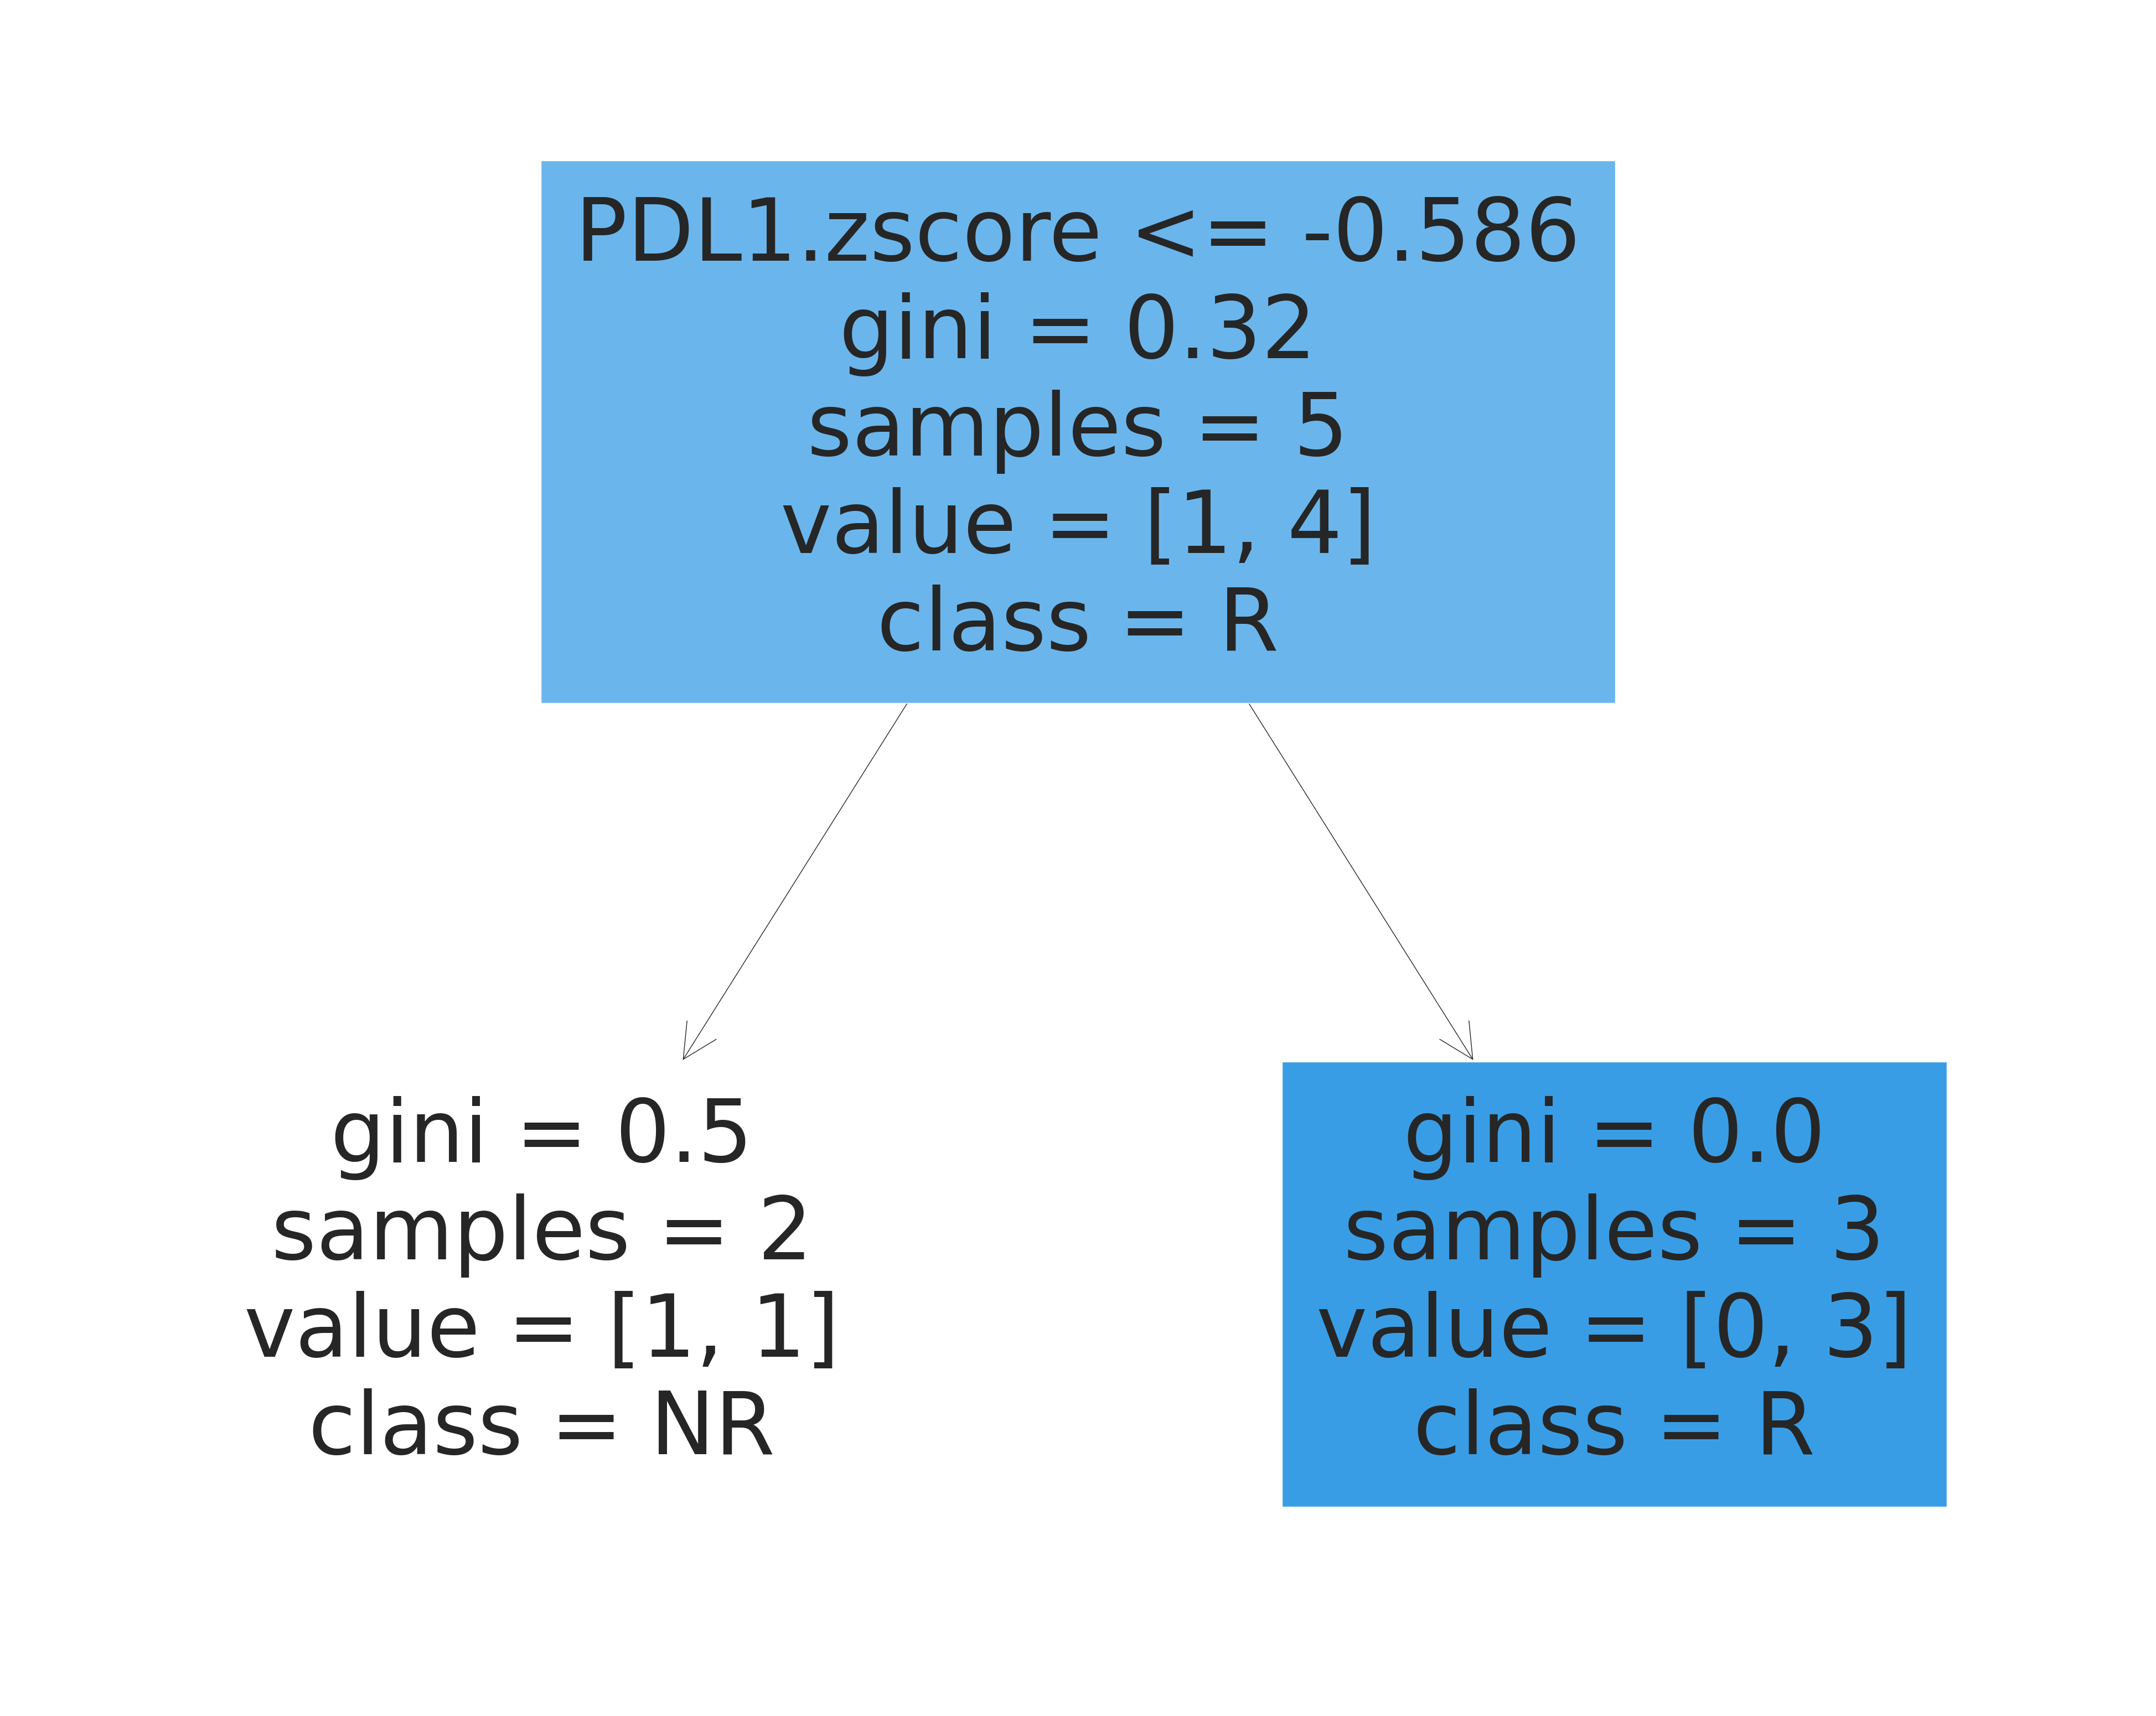

In [155]:
plot_decision_tree(m1, X_m1.columns.tolist(), "model_1_neuronal", str(min_samples_leaf))

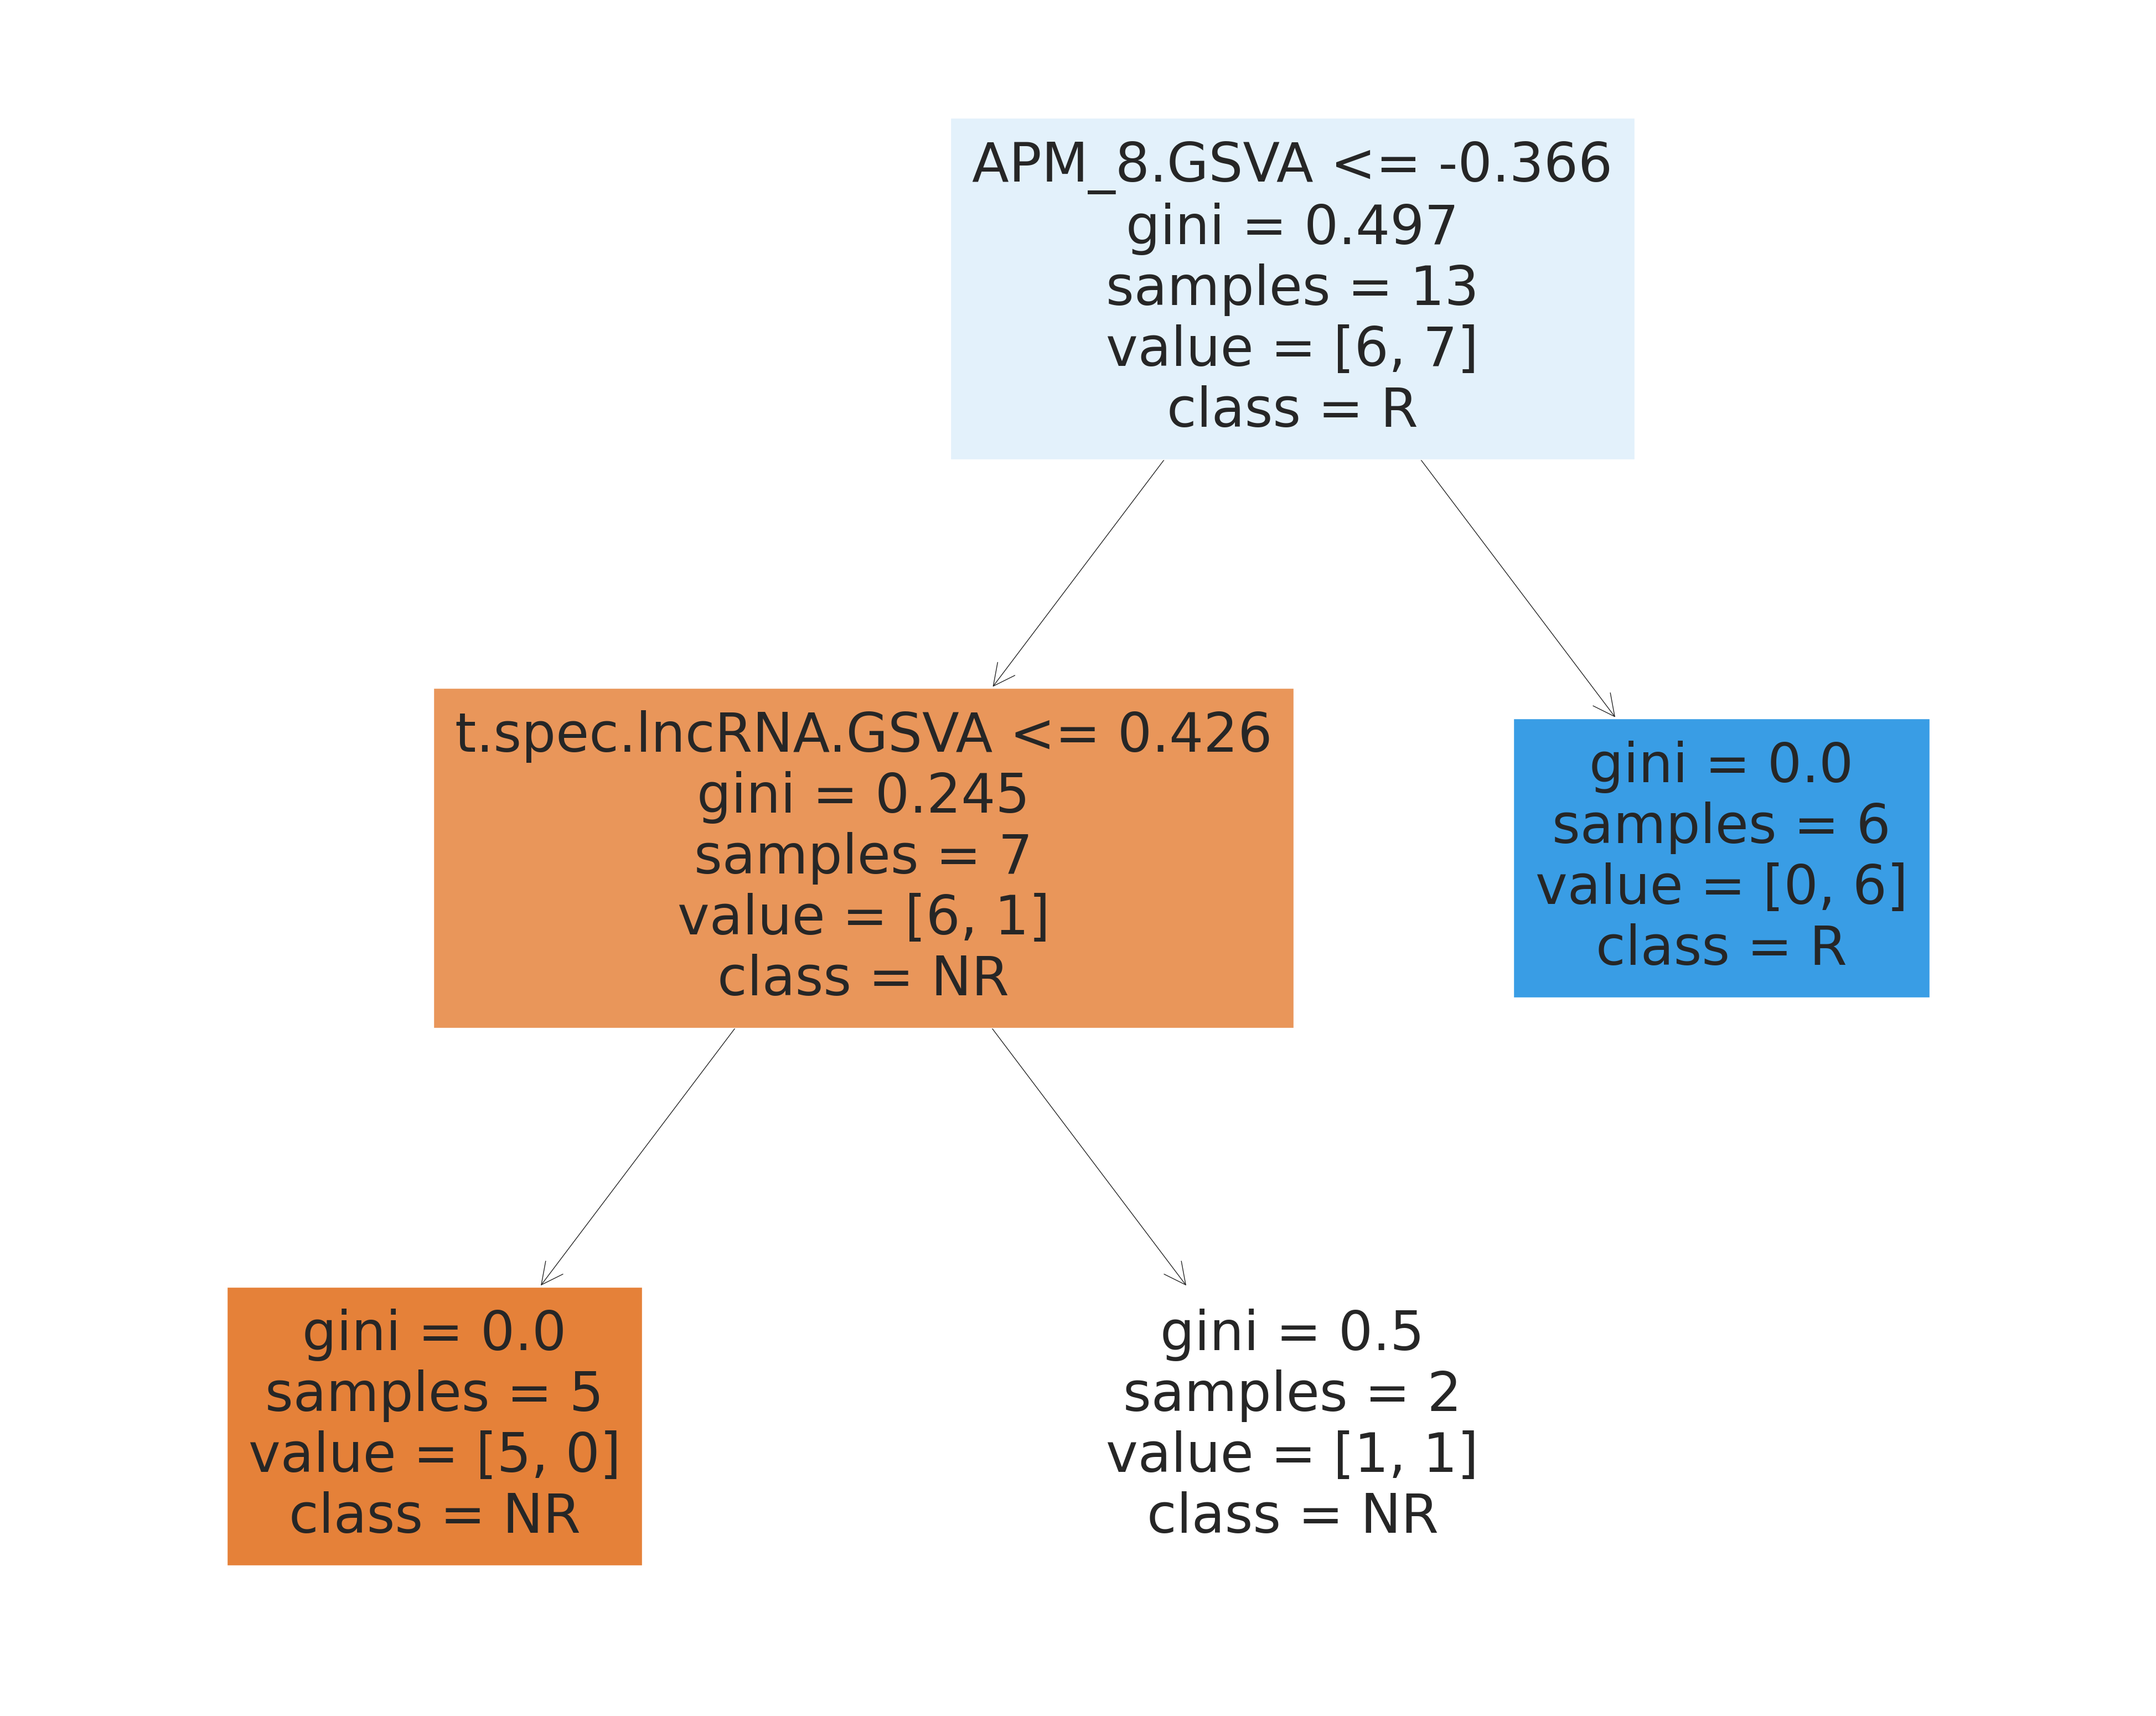

In [156]:
plot_decision_tree(m7, X_m7.columns.tolist(), "model_7_neuronal", str(min_samples_leaf))